In [1]:
import pandas as pd
import numpy as np
import urllib.parse
import urllib.request
from tqdm import tqdm
import os
import time
import subprocess
from scipy import stats
import matplotlib.pyplot as plt
import pickle

In [2]:
""" Get dataset (no sp) """
with open('../2020-05-21.enlarge_dataset_first_cut_then_predict/data_summary_no_sp.pickle', 'rb') as handle:
    DATA_NO_SP = pickle.load(handle)

In [3]:
""" Get dataset (sp) """
with open('../2020-05-18.enlarge_dataset/data_summary.pickle', 'rb') as handle:
    DATA_SP = pickle.load(handle)

/home/jan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/home/jan/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1392: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/home/jan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/home/jan/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1392: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/home/jan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/jan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/home/jan/.local/lib/python3.6/site-packages/numpy/lib/

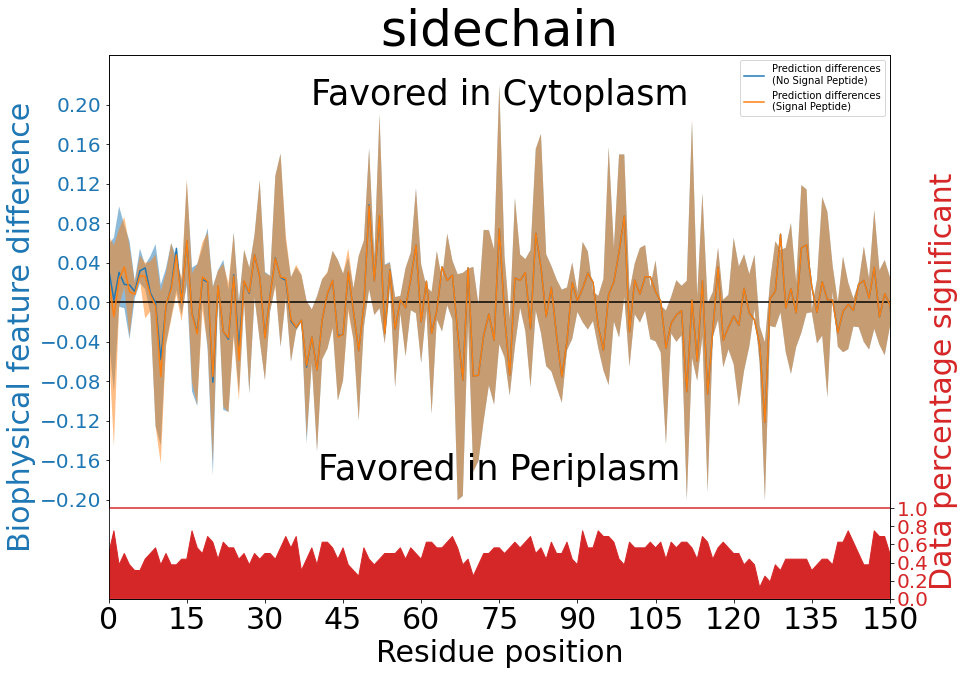

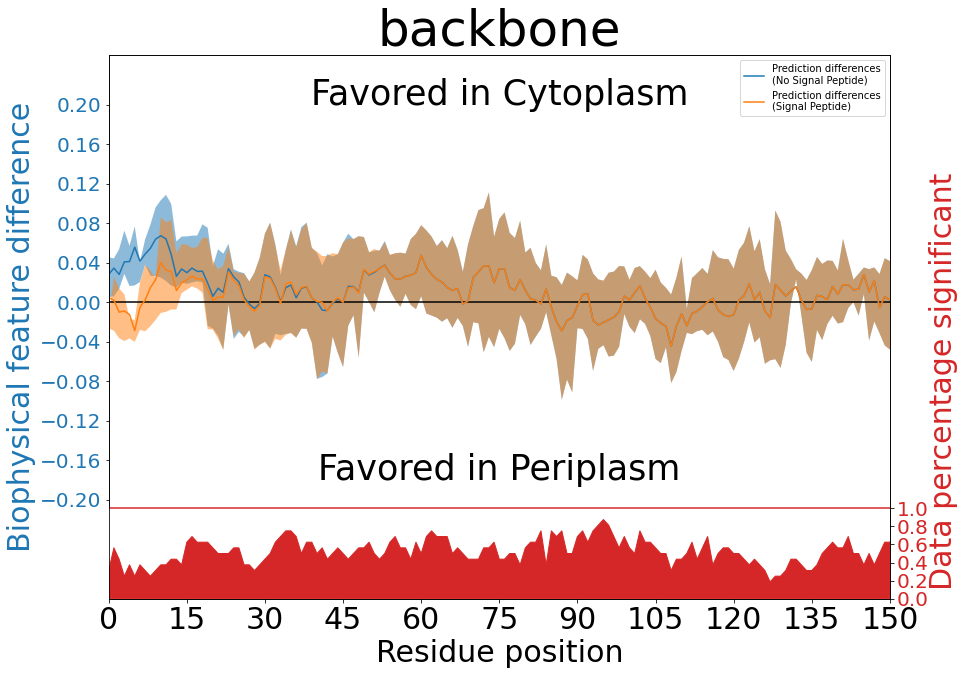

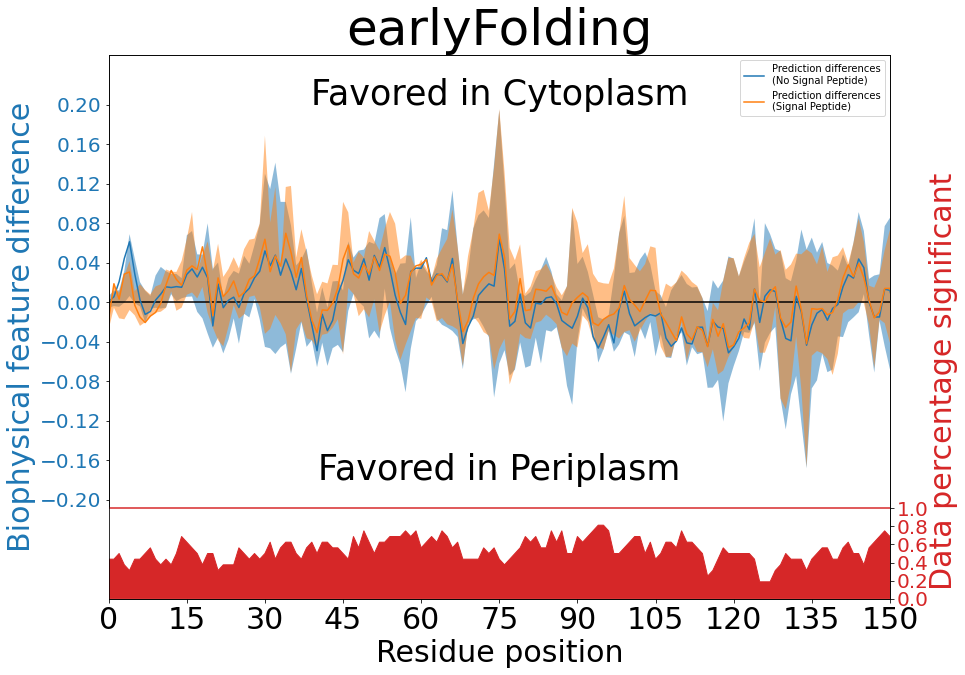

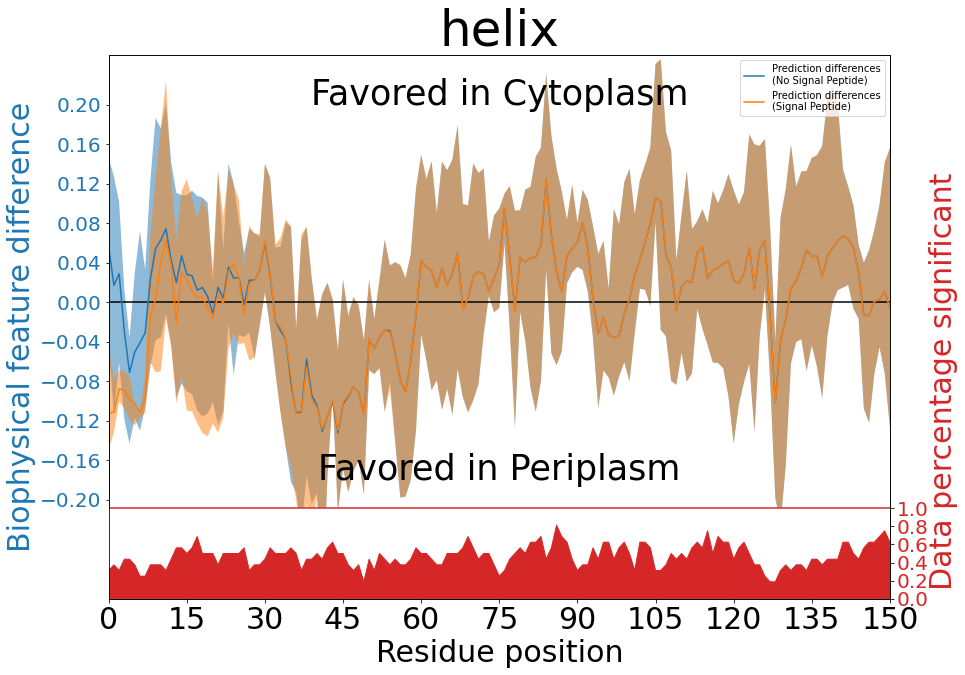

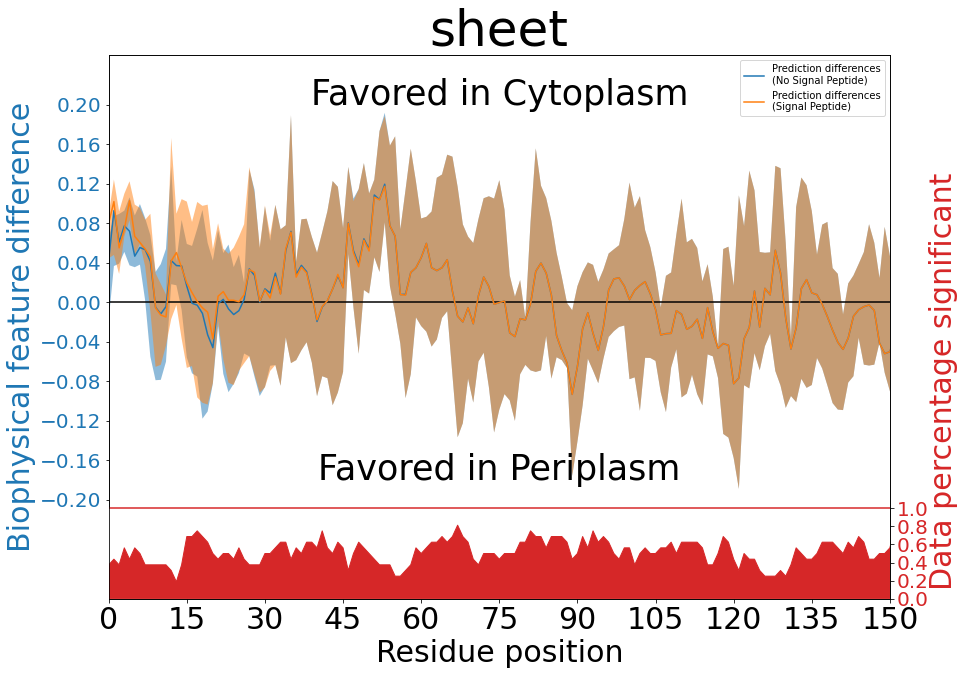

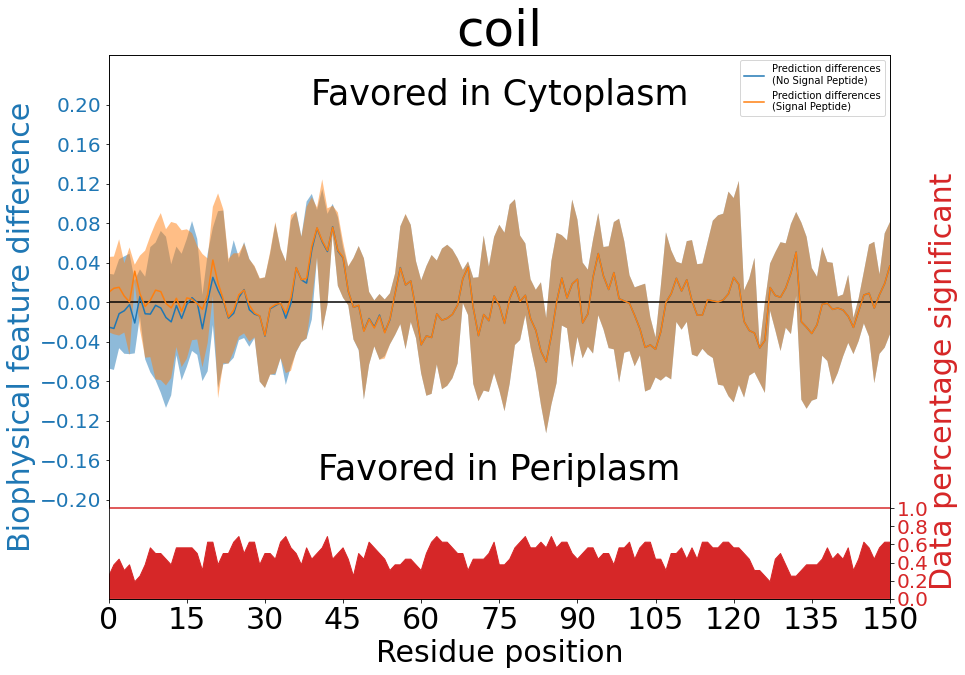

In [16]:
""" Visualise data """
FEATURES = ["{}_diff_medians".format(FEATURE) for FEATURE in ["sidechain","backbone", "earlyFolding", "helix","sheet","coil"]]
XLIM=150
for ID in FEATURES:
    fig = plt.figure(figsize=(14,10))
    ax1 = fig.add_subplot(111)
    
    
    ARRAY_NO_SP = DATA_NO_SP[ID]
    MEDIAN_NO_SP = np.nanmean(ARRAY_NO_SP,axis=0)
    PERCENTILE25_NO_SP = np.nanpercentile(ARRAY_NO_SP,25,axis=0)
    PERCENTILE75_NO_SP = np.nanpercentile(ARRAY_NO_SP,75,axis=0)
    ax1.fill_between(range(len(MEDIAN_NO_SP)),PERCENTILE25_NO_SP,PERCENTILE75_NO_SP,alpha=0.5)
    ax1.plot(MEDIAN_NO_SP,label="Prediction differences\n(No Signal Peptide)")
    
    ARRAY = DATA_SP[ID]
    MEDIAN = np.nanmean(ARRAY,axis=0)
    PERCENTILE25 = np.nanpercentile(ARRAY,25,axis=0)
    PERCENTILE75 = np.nanpercentile(ARRAY,75,axis=0)
    ax1.fill_between(range(len(MEDIAN)),PERCENTILE25,PERCENTILE75,alpha=0.5)
    ax1.plot(MEDIAN, label="Prediction differences\n(Signal Peptide)")
    
    ax1.hlines(0,0,XLIM)
    plt.title(ID.split("_")[0],fontsize=50)
    ax1.set_ylabel('Biophysical feature difference', color="tab:blue" ,fontsize=30)
    plt.yticks(np.arange(-0.20,0.21,0.04), color="tab:blue",fontsize=20)
    plt.ylim((-0.30,0.25))
    ax1.text(XLIM/2, 0.2, 'Favored in Cytoplasm', fontsize=35,horizontalalignment='center')
    ax1.text(XLIM/2, -0.18, 'Favored in Periplasm', fontsize=35,horizontalalignment='center')
    plt.xticks(np.arange(0,XLIM+15,15),fontsize=30)
    plt.xlabel("Residue position",fontsize=30)
    plt.xlim((0,XLIM))
    plt.legend()
    
    DATA_SIZE = np.count_nonzero(np.nan_to_num(ARRAY),axis=0) / 16
    
    ax2 = ax1.twinx()
    ax2.fill_between(range(len(DATA_SIZE)),np.zeros(len(DATA_SIZE)),np.ones(len(DATA_SIZE)),color="white")
    ax2.fill_between(range(len(DATA_SIZE)),np.zeros(len(DATA_SIZE)),DATA_SIZE,color="tab:red")
    
    ax2.hlines(1,0,XLIM,color="tab:red")
    ax2.set_ylabel('Data percentage significant', color="tab:red",fontsize=30 )
    ax2.yaxis.set_label_coords(1.05,0.4)
    plt.ylim((0,6))
    plt.yticks(np.arange(0,1.2,0.2), color="tab:red",fontsize=20)
    
    
    
    fig.savefig("{}.pdf".format(ID.split("_")[0]),bbox_inches='tight')
    
    fig.show()